In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Dataset .csv')

In [11]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [2]:
print(df['Rating text'])

0       Excellent
1       Excellent
2       Very Good
3       Excellent
4       Excellent
          ...    
9546    Very Good
9547    Very Good
9548         Good
9549    Very Good
9550    Very Good
Name: Rating text, Length: 9551, dtype: object


# Task1: Restaurant Reviews

Analyze the text reviews to identify the most
common positive and negative keywords.

In [3]:
positive_data = df.loc[df['Aggregate rating'] >= 2.5]
print(positive_data)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                           

In [23]:
rating_counts = df['Rating text'].value_counts()

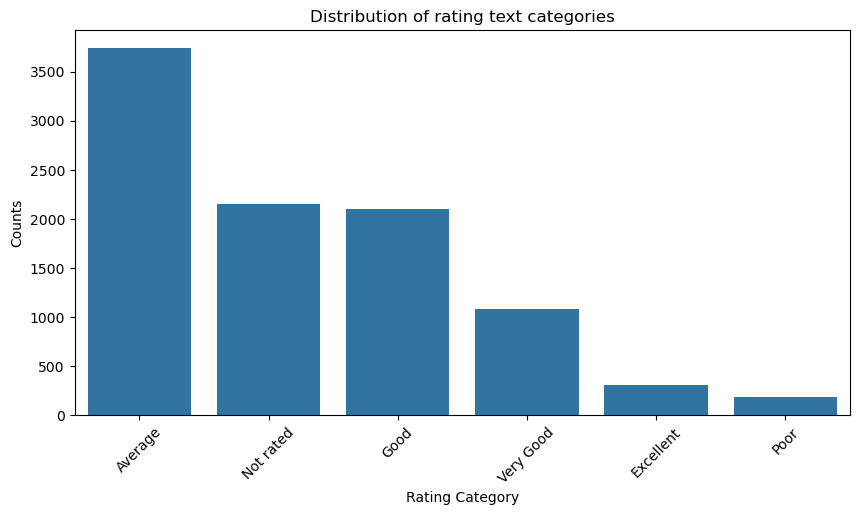

In [24]:
plt.figure(figsize = (10,5))
sns.barplot(x = rating_counts.index, y = rating_counts.values)
plt.xticks(rotation = 45)
plt.xlabel("Rating Category")
plt.ylabel("Counts")
plt.title("Distribution of rating text categories")
plt.show()

In [25]:
#display the most common rating text categories
rating_counts

Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

In [26]:
from collections import Counter

In [28]:
positive_ratings = ["Excellent", "Very Good", "Good"]
negative_ratings = ["Average", "Poor"]

In [29]:
positive_words = " ".join(df[df["Rating text"].isin(positive_ratings)]["Rating text"]).lower().split()
negative_words = " ".join(df[df["Rating text"].isin(negative_ratings)]["Rating text"]).lower().split()

In [31]:
positive_words_counts = Counter(positive_words).most_common(5)
negative_words_counts = Counter(negative_words).most_common(5)

positive_words_counts, negative_words_counts

([('good', 3179), ('very', 1079), ('excellent', 301)],
 [('average', 3737), ('poor', 186)])

Calculate the average length of reviews and
explore if there is a relationship between
review length and rating.

In [33]:
df["Rating text length"] = df["Rating text"].apply(lambda x: len(x.split()))

In [34]:
average_length = df["Rating text length"].mean()

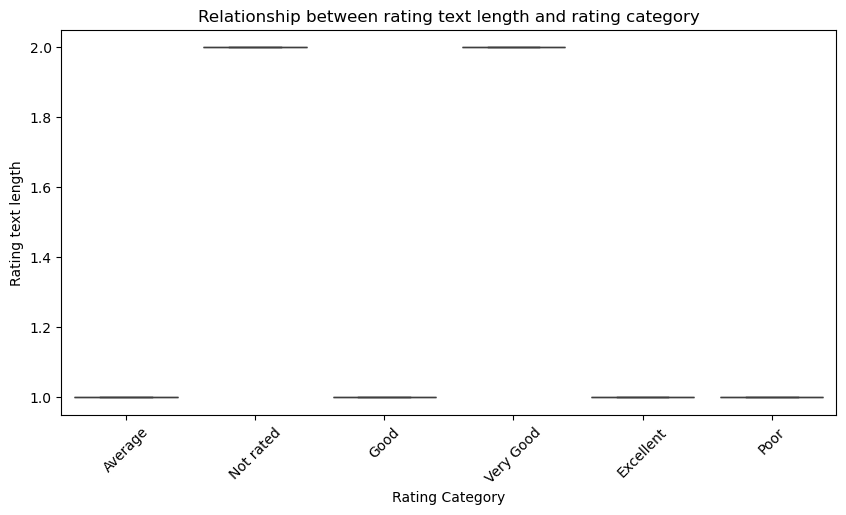

In [35]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Rating text", y = "Rating text length", data = df, order = rating_counts.index)
plt.xticks(rotation = 45)
plt.xlabel("Rating Category")
plt.ylabel("Rating text length")
plt.title("Relationship between rating text length and rating category")
plt.show()

# Task2: Votes Analysis

Identify the restaurants with the highest and
lowest number of votes.

In [12]:
Highest_voted_resturant = df.groupby('Restaurant Name')['Votes'].sum().sort_values(ascending = False)
Highest_voted_resturant = Highest_voted_resturant.idxmax()
print("The Highest Voted resturant is : ", Highest_voted_resturant)

The Highest Voted resturant is :  Barbeque Nation


In [14]:
lowest_rated_resturant = df.groupby("Restaurant Name")['Votes'].sum().sort_values()
lowest_rated_resturant = lowest_rated_resturant.idxmin()
print("The Lowest voted resturent is: ", lowest_rated_resturant)

The Lowest voted resturent is:  Laxmi Food Corner


Analyze if there is a correlation between the
number of votes and the rating of a
restaurant.

In [16]:
correlation = np.corrcoef(df['Votes'],df['Aggregate rating'])
correlation = np.round(correlation,2)
print(correlation)

[[1.   0.31]
 [0.31 1.  ]]


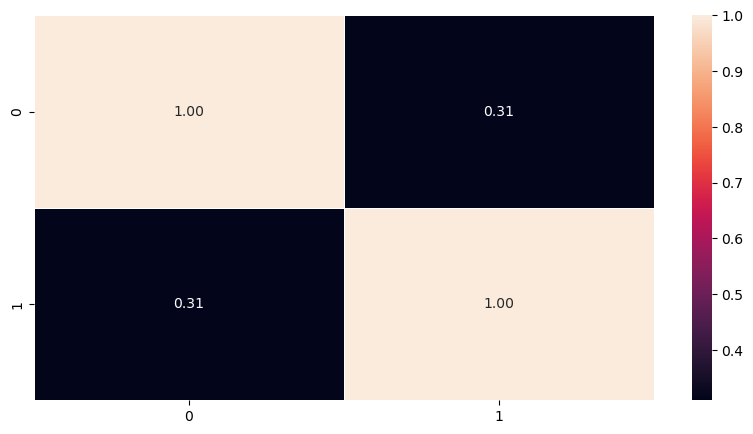

In [19]:
plt.figure(figsize=(10,5), dpi = 100)
sns.heatmap(correlation, annot = True, fmt = ".2f", linewidth = .4)
plt.show()

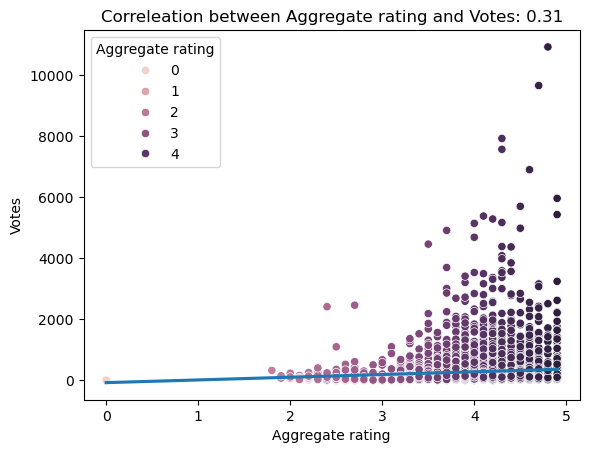

As per result correlation value = 0.31, which indicates there is a moderate positive corelation between these two varibles.


In [21]:
sns.scatterplot(data=df, y = "Votes", hue = "Aggregate rating", x = "Aggregate rating")
sns.regplot(data = df, x = "Aggregate rating", y = "Votes", scatter = False)
plt.title(f"Correleation between Aggregate rating and Votes: 0.31")
plt.show()
print("As per result correlation value = 0.31, which indicates there is a moderate positive corelation between these two varibles.")

# Task3: Price Range vs. Online Delivery and Table Booking

Analyze if there is a relationship between the
price range and the availability of online
delivery and table booking.


In [22]:
x1 = df["Has Online delivery"]
y = df['Average cost for two']
x2 = df["Has table booking"]

KeyError: 'Average cost for two'